# Leading Recommendation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

### Initial Configuration

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

### Reading Data

In [3]:
df_market = pd.read_csv('data/estaticos_market.csv', index_col=0)
df_portf1 = pd.DataFrame(pd.read_csv('data/estaticos_portfolio1.csv', index_col=0)['id'])
df_portf2 = pd.read_csv('data/estaticos_portfolio2.csv', index_col=0)
df_portf3 = pd.read_csv('data/estaticos_portfolio3.csv', index_col=0)

### Pre-processing

In [4]:
# Fixing fl_rm column
df_market['fl_rm'].replace({'SIM':True, 'NAO':False}, inplace=True)

In [5]:
# FunctionTransformer to fill null/empty/nan avlues with the mode of each selected column.
# It's necessary for the pipeline below.
def mode_func(X):
    return X.fillna(value=X.mode().to_dict('index')[0])

In [6]:
# Fill with 0
fill_0_cols = ['vl_total_tancagem', 'vl_total_veiculos_antt', 'vl_total_veiculos_leves', 'vl_total_veiculos_pesados',
               'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas',
               'qt_socios_st_suspensa', 'qt_socios_feminino', 'qt_socios_pep', 'qt_socios_pj_ativos', 
               'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_socios_pj_inaptos',
               'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj', 'vl_idade_minima_socios_pj', 'qt_coligados',
               'qt_socios_coligados', 'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada',
               'qt_coligados_inapta', 'qt_coligados_suspensa', 'idade_media_coligadas',
               'idade_maxima_coligadas', 'idade_minima_coligadas', 'coligada_mais_nova_ativa', 
               'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 'coligada_mais_nova_baixada',
               'coligada_mais_antiga_baixada', 'idade_media_coligadas_baixadas', 'qt_coligados_sa', 'qt_coligados_me',
               'qt_coligados_mei', 'qt_coligados_ltda', 'qt_coligados_epp', 'qt_coligados_norte', 'qt_coligados_sul',
               'qt_coligados_nordeste', 'qt_coligados_centro', 'qt_coligados_sudeste', 'qt_coligados_exterior',
               'qt_ufs_coligados', 'qt_regioes_coligados', 'qt_ramos_coligados', 'qt_coligados_industria',
               'qt_coligados_agropecuaria', 'qt_coligados_comercio', 'qt_coligados_serviço', 'qt_coligados_ccivil',
               'qt_funcionarios_coligados', 'qt_funcionarios_coligados_gp', 'media_funcionarios_coligados_gp',
               'max_funcionarios_coligados_gp', 'min_funcionarios_coligados_gp', 'vl_folha_coligados', 
               'media_vl_folha_coligados', 'max_vl_folha_coligados', 'min_vl_folha_coligados', 
               'vl_folha_coligados_gp', 'media_vl_folha_coligados_gp', 'max_vl_folha_coligados_gp', 
               'min_vl_folha_coligados_gp', 'faturamento_est_coligados', 'media_faturamento_est_coligados', 
               'max_faturamento_est_coligados', 'min_faturamento_est_coligados', 'faturamento_est_coligados_gp', 
               'media_faturamento_est_coligados_gp', 'max_faturamento_est_coligados_gp', 
               'min_faturamento_est_coligados_gp', 'total_filiais_coligados', 'media_filiais_coligados', 
               'max_filiais_coligados', 'min_filiais_coligados', 'qt_coligadas', 'sum_faturamento_estimado_coligadas', 
               'qt_ex_funcionarios', 'qt_funcionarios_grupo', 'percent_func_genero_masc', 'percent_func_genero_fem', 
               'idade_de_19_a_23', 'idade_de_24_a_28', 'idade_de_29_a_33', 'idade_de_34_a_38', 'idade_de_39_a_43', 
               'idade_de_44_a_48', 'idade_de_49_a_53', 'idade_de_54_a_58', 'idade_acima_de_58', 'idade_ate_18', 
               'grau_instrucao_macro_escolaridade_fundamental', 'grau_instrucao_macro_escolaridade_media', 
               'grau_instrucao_macro_escolaridade_superior', 'vl_frota', 'qt_socios', 'qt_socios_pf', 'qt_socios_pj',
               'qt_socios_st_regular', 'vl_total_veiculos_leves_grupo', 'vl_total_veiculos_pesados_grupo',
               'grau_instrucao_macro_analfabeto']
fill_0_pipe = Pipeline([('fill_0', SimpleImputer(strategy='constant', fill_value=0))])

# Fill with Mean
fill_mean_cols = ['media_meses_servicos_all', 'max_meses_servicos_all', 'min_meses_servicos_all', 
                  'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos', 'meses_ultima_contratacaco',
                  'empsetorcensitariofaixarendapopulacao', 'idade_maxima_socios', 'idade_media_socios',
                  'idade_minima_socios', 'nu_meses_rescencia', 'vl_faturamento_estimado_aux', 
                  'vl_faturamento_estimado_grupo_aux']
fill_mean_pipe = Pipeline([('fill_mean', SimpleImputer(strategy='mean'))])

# Fill with Median
fill_median_cols = ['nu_meses_rescencia', 'total', 'qt_funcionarios', 'qt_funcionarios_12meses', 
                    'qt_funcionarios_24meses', 'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
                    'qt_admitidos_12meses', 'qt_desligados_12meses', 'qt_desligados', 'qt_admitidos', 
                    'qt_socios_masculino']
fill_median_pipe = Pipeline([('fill_median', SimpleImputer(strategy='median'))])

# Fill with most_frequent
fill_freq_cols = ['de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo', 'de_nivel_atividade',
                  'de_saude_rescencia', 'de_saude_tributaria']
fill_freq_trasnf = FunctionTransformer(mode_func)

# Fill with INDETERMINADA
fill_indeterm_cols = ['de_indicador_telefone', 'nm_meso_regiao', 'nm_segmento', 'sg_uf_matriz']
fill_indeterm_pipe = Pipeline([('fill_indeterm', SimpleImputer(strategy='constant', fill_value='INDETERMINADA'))])

# Fill with False
fill_false_cols = ['fl_spa', 'fl_antt', 'fl_veiculo', 'fl_optante_simei', 'fl_optante_simples', 
                   'fl_simples_irregular', 'fl_passivel_iss']
fill_false_pipe = Pipeline([('fill_false', SimpleImputer(strategy='constant', fill_value=False))])

# Drop unecessary / empty / duplicated columns
drop_cols = ['id', 'dt_situacao', 'qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d',
             'qt_alteracao_socio_365d', 'grau_instrucao_macro_desconhecido', 'idade_emp_cat', 'nm_divisao', 'de_ramo',
             'sg_uf', 'de_natureza_juridica', 'setor', 'nm_micro_regiao', 'qt_coligados_atividade_alto', 
               'qt_coligados_atividade_medio', 'qt_coligados_atividade_baixo', 'qt_coligados_atividade_mt_baixo', 
               'qt_coligados_atividade_inativo', 'fl_epp', 'qt_coligados_nula']

# Null handler pipeline
null_handler = ColumnTransformer(transformers=[
    ('drop', 'drop', drop_cols),
    ('fill_0', fill_0_pipe, fill_0_cols),
    ('fill_mean', fill_mean_pipe, fill_mean_cols),
    ('fill_median', fill_median_pipe, fill_median_cols),
    ('fill_freq', fill_freq_trasnf, fill_freq_cols),
    ('fill_false', fill_false_pipe, fill_false_cols),
    ('fill_indeterm', fill_indeterm_pipe, fill_indeterm_cols)
], remainder='passthrough')

# Final pipeline
pipeline = Pipeline([
    ('null_handler', null_handler),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ('std', StandardScaler(with_mean=False)),
    ('svd', TruncatedSVD(100, algorithm='arpack'))
])

In [7]:
df_proc = pd.DataFrame(pipeline.fit_transform(df_market))

### Calculating centroid for portfolio

In [8]:
df_proc['id'] = df_market['id']
df_portf = pd.merge(df_portf1, df_proc, on='id')

kmeans = KMeans(n_clusters=1, random_state=0).fit(df_portf.drop(columns=['id']))
portf_centroid = kmeans.cluster_centers_

### Finding the nearest neighbors of the centroid from the market dataset

In [9]:
# Finding the nearest neighbors of the centroid from the market dataset

nbrs = NearestNeighbors(n_neighbors=100, metric='cosine').fit(df_proc.drop(columns=['id']))
distances, indices = nbrs.kneighbors(portf_centroid)

In [10]:
# Showing recommended leads

lead_recom = df_market.loc[indices[0], :]
lead_recom

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
414018,fd12ebf80b8d3e3bf7db287386d388e1b135aa7132fae1...,False,SOCIEDADE EMPRESARIA LIMITADA,AM,ENTIDADES EMPRESARIAIS,COMERCIO POR ATACADO,COMERCIO,23.654795,> 20,False,False,False,False,False,

### Data for plotting graphics

In [11]:
region_values = (lead_recom['nm_meso_regiao'].value_counts().index, lead_recom['nm_meso_regiao'].value_counts().values)
seg_values = (lead_recom['nm_segmento'].value_counts().index, lead_recom['nm_segmento'].value_counts().values)
fat_values = (lead_recom['de_faixa_faturamento_estimado'].value_counts().index, lead_recom['de_faixa_faturamento_estimado'].value_counts().values)
trib_values = (lead_recom['de_saude_tributaria'].value_counts().index, lead_recom['de_saude_tributaria'].value_counts().values)
lead_count = lead_recom.shape[0]

### Regions

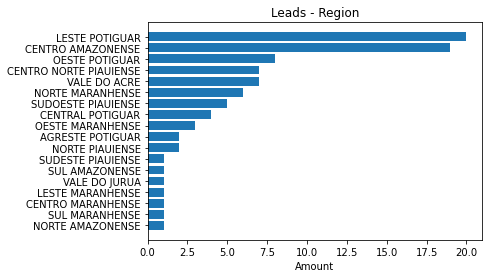

In [12]:
fig, ax = plt.subplots()

y_pos = region_values[0]
amount = region_values[1]

ax.barh(y_pos, amount, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()
ax.set_xlabel('Amount')
ax.set_title('Leads - Region')

plt.show()

### Bussiness

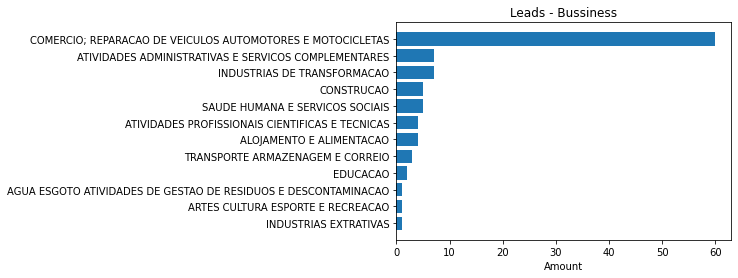

In [13]:
fig, ax = plt.subplots()

y_pos = seg_values[0]
amount = seg_values[1]

ax.barh(y_pos, amount, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()
ax.set_xlabel('Amount')
ax.set_title('Leads - Bussiness')

plt.show()

### Estimated Profit

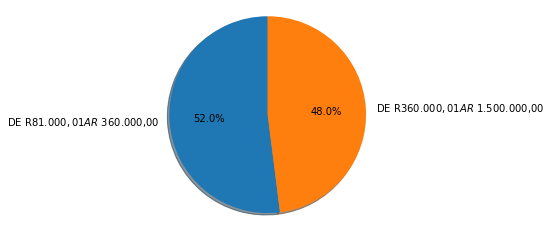

In [14]:
fig3, ax3 = plt.subplots()
ax3.pie(fat_values[1], labels=fat_values[0], autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')
plt.show()

### Tax Health

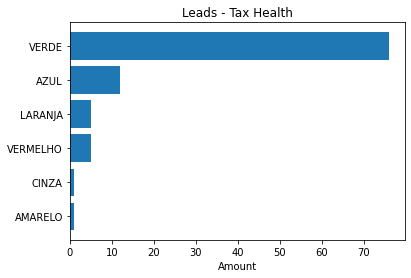

In [15]:
fig, ax = plt.subplots()

y_pos = trib_values[0]
amount = trib_values[1]

ax.barh(y_pos, amount, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_pos)
ax.invert_yaxis()
ax.set_xlabel('Amount')
ax.set_title('Leads - Tax Health')

plt.show()